# **Clustering**

### **Import** section

In [1]:
from random import sample
import numpy as np
import pandas as pd
import itertools
pd.set_option('display.expand_frame_repr', False)

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.cluster import KMeans, DBSCAN

---
### Text **normalization**

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import re

#nltk.download('stopwords')
#nltk.download('punkt')
ps = PorterStemmer()

def itemParser(s):
    
    s = s.replace("\n", "")
    s = re.sub(r'[^\w\s]', '', s)
    s = re.sub(r"(\d)", "", s)
    s = re.sub(r'\([^)]*\)', '', s)
    s = re.sub(u'\w*\u2122', '', s)

    s = s.lower()

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)

    filtered_sentence = [ps.stem(w) for w in word_tokens if not w in stop_words]
    s = ' '.join(filtered_sentence)
    
    return s

---
## **Read** dataset and **Mapping**

In [3]:
superm = []
baskets = []
with open('../Data/groceries_norm.csv', 'r') as f:
    for line in f:
        basket = []
        line = line.replace('\n', '')
        items = line.split(",")
        for item in items:
            #parsed = itemParser(item)
            superm.append(item)
            basket.append(item)
        baskets.append(basket)

In [4]:
products = list(set(superm))

In [5]:
# Mapping
elems = set()
for b in baskets:
    elems.update(b)

mapping = {}
reverseMapping = {}
key = 0
for e in elems:
    mapping[e] = key
    reverseMapping[key] = e
    key += 1

In [6]:
singletons = {}
for b in baskets:
    for item in b:
        if item not in singletons.keys():
            singletons[item] = 0
        singletons[item] += 1

---
### Dataset **Transformations** - (*One Hot Encoder*)

In [7]:
ohe_baskets = []
for basket in baskets:
    ohe = [0 for _ in range(len(mapping))]
    for item in basket:
        ohe[mapping[item]] = 1
    ohe_baskets.append(ohe)

In [8]:
pd_ohe = pd.DataFrame(ohe_baskets)
display(pd_ohe)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
## **Tests**

### Basket size count

In [9]:
maxlen = 0
for b in baskets:
    if len(b) > maxlen:
        maxlen = len(b)
        
count = [0 for _ in range(maxlen + 1)]
for b in baskets:
    count[len(b)] += 1

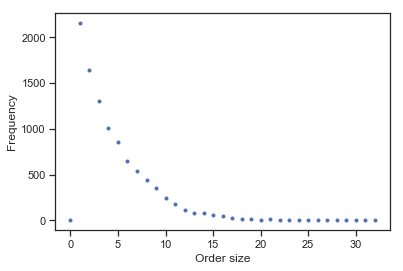

In [10]:
plt.ylabel("Frequency")
plt.xlabel("Order size")
plt.plot(count, ".")

### **PCA** > Clustering

In [11]:
pca = PCA(n_components=5)
pcat = pca.fit_transform(pd_ohe)
principalDf = pd.DataFrame(data=pcat)

In [12]:
display(principalDf)

,0,1,2,3,4
0,-0.268559,-0.177765,0.160002,-0.073818,0.172213
1,-0.008951,-0.027883,0.187771,0.001734,0.994729
2,0.065771,-0.659628,-0.504139,0.168024,-0.213519
3,-0.049927,-0.075107,0.183489,-0.018225,0.879798
4,0.553877,-0.560578,0.124632,-0.018990,-0.611790
...,...,...,...,...,...
9830,1.317783,-0.336921,0.007947,0.174308,-0.008517
9831,-0.519433,-0.218658,0.045989,-0.066179,0.005529
9832,0.830911,0.542214,0.408589,-0.888530,0.347125
9833,-0.387963,0.579730,-0.047698,0.784999,-0.077118


#### Analysis

In [ ]:
g = sns.pairplot(principalDf)

In [ ]:
# Details
xx = list(principalDf[2])
yy = list(principalDf[3])

plt.scatter(xx, yy, marker=".")

### **KMeans**

In [ ]:
'''
kmeans = KMeans(n_clusters=10).fit(interessanti)
centroids = kmeans.cluster_centers_
print(centroids)
'''

In [ ]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf)
    distortions.append(kmeanModel.inertia_)

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(principalDf)
labels = []
labels = list(kmeanModel.predict(principalDf))

In [18]:
principalDf['Cluster'] = pd.Series(labels)

In [15]:
display(principalDf)

,0,1,2,3,4,Cluster
0,-0.268559,-0.177765,0.160002,-0.073818,0.172213,2
1,-0.008951,-0.027883,0.187771,0.001734,0.994729,6
2,0.065771,-0.659628,-0.504139,0.168024,-0.213519,9
3,-0.049927,-0.075107,0.183489,-0.018225,0.879798,6
4,0.553877,-0.560578,0.124632,-0.018990,-0.611790,1
...,...,...,...,...,...,...
9830,1.317783,-0.336921,0.007947,0.174308,-0.008517,5
9831,-0.519433,-0.218658,0.045989,-0.066179,0.005529,2
9832,0.830911,0.542214,0.408589,-0.888530,0.347125,3
9833,-0.387963,0.579730,-0.047698,0.784999,-0.077118,0


### **DBSCAN**

In [ ]:
dataset = principalDf[[0,1,2,3,4]]
display(dataset)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(dataset)

In [ ]:
#np.unique(dbscan)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('n clust:', n_clusters_)
print('n noise:', n_noise_)

In [ ]:
principalDf['DB_Scan'] = pd.Series(labels)

In [ ]:
xx = list(principalDf[2])
yy = list(principalDf[3])

plt.scatter(xx, yy, c=labels, s=5, cmap='viridis')

In [64]:
principalDf.to_pickle("../Data/Clustered_Basket.pkl")
# File read by Basket-Recipes

---
## Clustering **Analysis**

In [19]:
clusteredBasket = list(zip(baskets, predicted))

In [20]:
def countItems(lista, top):
    counting = {}
    for items in lista:
        for item in items:
            if item not in counting.keys():
                counting[item] = 0
            counting[item] += 1
            
    counting = [(k, v) for k, v in sorted(counting.items(), key=lambda item: item[1], reverse=True)]
    tops = counting[:top]
    
    for (k, v) in tops:
        print("      " + str(k) + " [" + str(v) + "]")
        
    return tops

In [21]:
pdClusteredBasket = pd.DataFrame(clusteredBasket, columns=["Basket", "Cluster"])
pdClusteredBasket

,Basket,Cluster
0,"[citru fruit, semifinish bread, margarin, read...",2
1,"[tropic fruit, yogurt, coffe]",6
2,[whole milk],9
3,"[pip fruit, yogurt, cream chees, meat spread]",6
4,"[veget, whole milk, condens milk, long life ba...",1
...,...,...
9830,"[sausag, chicken, beef, hamburg meat, citru fr...",5
9831,[cook chocol],2
9832,"[chicken, citru fruit, veget, butter, yogurt, ...",3
9833,"[semifinish bread, bottl water, soda, bottl beer]",0


In [22]:
# Single Cluster Analysis
clusters = []
for i in range(10):
    clusters.append(pdClusteredBasket.loc[pdClusteredBasket['Cluster'] == i]) 

In [96]:
# Top 10 cluster items



unique_labels = []
all_tops = []

for i in range(10):
    print("Cluster " + str(i+1) + ":")
    tops = countItems(list(clusters[i]["Basket"]), 20)
    all_tops.append(tops)
    for item in tops:
        unique_labels.append(str(item[0]))

unique_labels = set(unique_labels)

count = {}
for unique_item in unique_labels:
    count[unique_item] = []
    
for t in all_tops:
    content = [x[0] for x in t]
    counting = [x[1] for x in t]
    for product in unique_labels:
        
        index = 0
        found = False
        for c in content:
            if c == product:
                found = True
                count[product].append(counting[index])
            index += 1
            
        if not found:
            count[product].append(0)    

final = []
for k in count:
    final.append(count[k])
    
#print(len(final))

Cluster 1:
      soda [951]
      bottl water [154]
      shop bag [137]
      bottl beer [106]
      can beer [85]
      fruitveget juic [83]
      pastri [82]
      sausag [81]
      veget [62]
      tropic fruit [55]
      pork [53]
      chocol [52]
      brown bread [50]
      newspap [50]
      salti snack [50]
      yogurt [49]
      coffe [47]
      napkin [47]
      uhtmilk [46]
      root veget [45]
Cluster 2:
      whole milk [451]
      veget [447]
      root veget [142]
      soda [82]
      whippedsour cream [78]
      domest egg [76]
      tropic fruit [73]
      pip fruit [72]
      pork [69]
      citru fruit [67]
      butter [60]
      chicken [56]
      brown bread [54]
      pastri [54]
      frozen veget [53]
      beef [53]
      rollsbun [52]
      shop bag [49]
      curd [49]
      margarin [48]
Cluster 3:
      can beer [458]
      bottl beer [323]
      shop bag [296]
      bottl water [267]
      pastri [220]
      newspap [216]
      coffe [188]
      saus

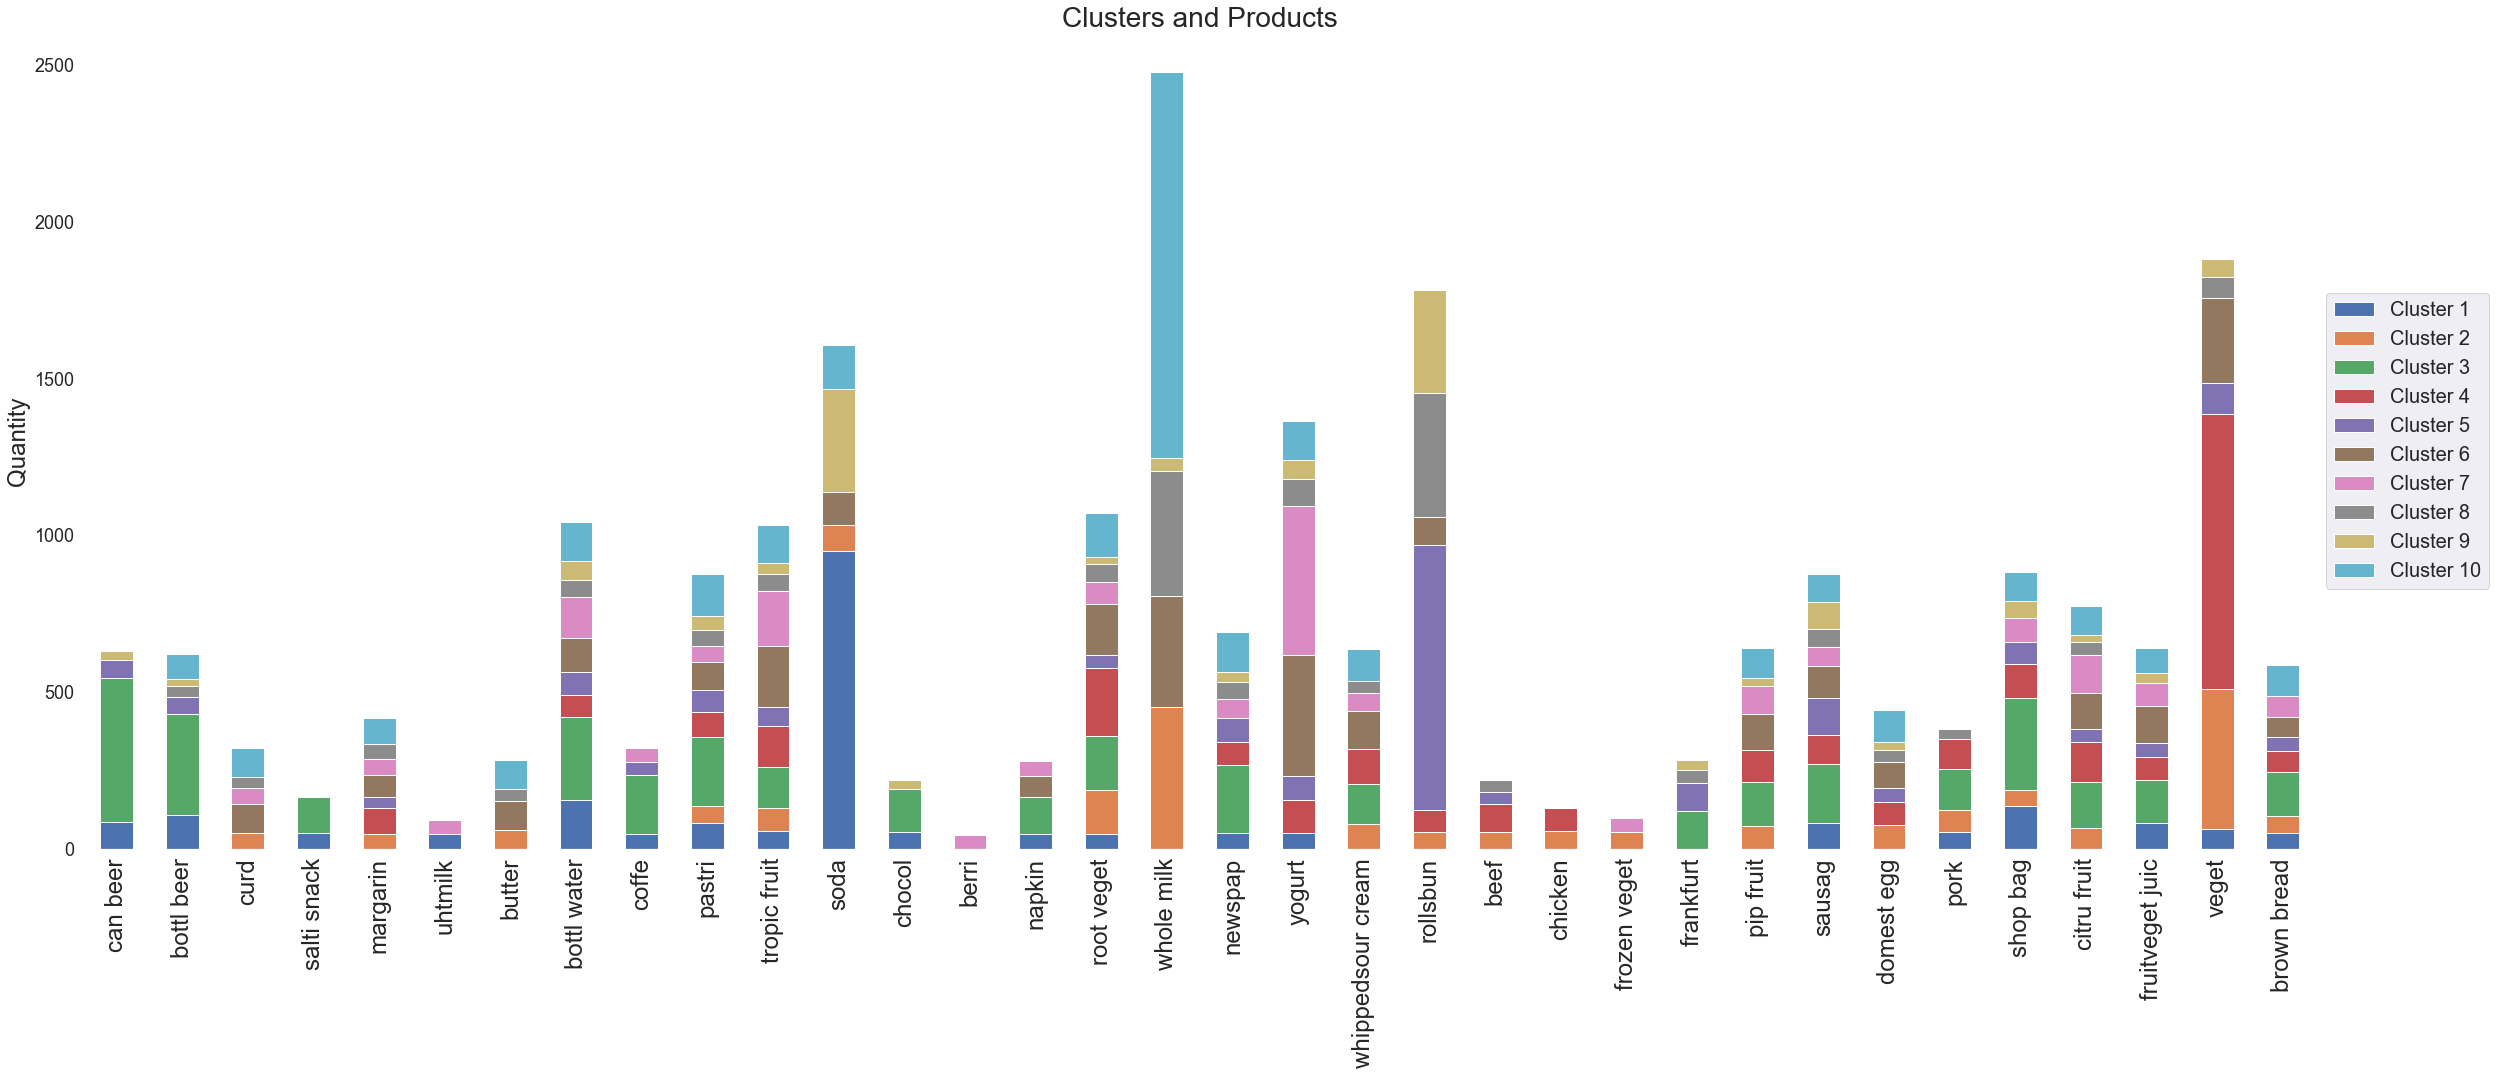

In [99]:
count
df = pd.DataFrame(count)

import pandas as pd
from matplotlib.pyplot import *

fig, ax = plt.subplots(figsize=(40,15))
#fig.figure(figsize=[40,20])
ax.set_facecolor("white")
df.T.plot(kind='bar', stacked=True,ax=ax)


plt.ylabel('Quantity',fontsize=24)
plt.title('Clusters and Products',fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
#plt.yticks(np.arange(0, 81, 10))
#plt.legend(["Cluster " + str(x) for x in range(1, 11)], loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
#ax.set_xticks(unique_labels)
ax.legend(["Cluster " + str(x) for x in range(1, 11)], loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)





In [ ]:
'''final
cumulative = []
for f in final:
    cumulative.append(np.cumsum(f).tolist()[::-1])'''

In [ ]:
'''final
tmp = []
for cluster in final:
    somma = sum(cluster)
    row = [x/somma for x in cluster]
    tmp.append(row)
    '''

In [ ]:
'''finalT = np.array(tmp).T.tolist()'''

In [53]:
df = pd.DataFrame(final).T
display(df)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,85,106,154,0,82,55,951,0,0,0,...,0,0,81,0,0,137,0,83,62,0
1,0,0,0,0,0,73,82,142,451,0,...,0,72,0,76,69,0,67,0,447,0
2,458,323,267,188,220,0,0,172,0,216,...,0,0,188,0,0,296,146,0,0,0
3,0,0,0,0,0,130,0,218,0,0,...,0,100,94,0,96,107,126,0,878,0
4,0,0,72,0,70,63,0,0,0,77,...,90,0,117,0,0,71,0,0,99,0
5,0,0,110,0,0,194,0,164,356,0,...,0,117,0,0,0,0,114,116,272,0
6,0,0,132,0,0,174,0,68,0,59,...,0,89,0,0,0,76,121,74,0,65
7,0,0,54,0,51,55,0,57,398,56,...,0,0,57,0,0,0,0,0,67,0
8,0,0,59,0,44,36,328,0,43,0,...,0,0,88,0,0,55,0,0,58,0
9,0,0,124,0,132,120,143,140,1231,129,...,0,0,0,103,0,0,0,0,0,0


AttributeError: module 'seaborn' has no attribute 'xlabel'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = len(count)
print(N)
plt.figure(figsize=[40,20])

ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

plt.bar(ind, vals, width)
'''for i in range(10):
    print(vals[i])
    
    plt.draw()'''

plt.ylabel('Scores',fontsize=18)
plt.title('Scores by group and gender',fontsize=24)
plt.xticks(ind, unique_labels, rotation='vertical',fontsize=20)
#plt.yticks(np.arange(0, 81, 10))
plt.legend(["Cluster " + str(x) for x in range(1, 11)], loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)

plt.show()